# The `pandas` Library

:::{admonition} Lesson Content
:class: note, dropdown

- 🗃️ Libraries
- 🐼 `pandas` Data structures
- 🔍 Accessing values in DataFrames
- 💧 Filepaths & Opening files with USGS stream gauge data
- 👨‍👦‍👦 Some Aggregations

:::

## Context
Today we are building up our arsenal of data structures with a really exciting one - the `pandas` `Dataframe`.  This is a data structure that models **tabular data**, or data with rows and columns. Learning this data structure will allow us to start manipulating large datasets of that format, and will allow us to do things that we couldn't otherwise do in a program like excel.

Today we will focus on opening and inspecting data, using USGS stream gauge data as an applied example.

![Summary Slide](./images/summaryslide_3tabular.jpg)

## 🗃️ Libraries

Today we are going to dig into our first library in Python!  A **library** is a like an "extras" package for a programming language (think Settlers of Catan expansion pack).  It is a set of commands that doesn't automatically come activated when you use Python, but that you can still use if you just tell Python that you plan to do so.  You let python know you are going to use a library with an `import` statment.  After you do that the additional commands become availble.

In [ ]:
# Attempting to use the `math` libray before importing
math.factorial(3)

In [ ]:
# Importing a Python library
import math

In [ ]:
# Attempt #2 to use the `math` libray, after importing
math.factorial(3)

Once we have imported the library we can use the new commands that the library contains.  The `math` library was just an example and it isn't the focus of this lesson, but if you want you can see a list of `math` commands [here](https://docs.python.org/3/library/math.html).

:::{admonition} 🌀 More Info: Standard vs. Non-standard Libraries
:class: note, dropdown

One large chunk of libraries are together referred to as the **Python Standard Library**. These libraries are not a part of the "core" language (everything we can do without import statments) but have still been offically accepted into the Python distribution package and are maintained in the same way as the rest of the core language.  You can read more [here](https://docs.python.org/3/tutorial/stdlib.html).

There are also libraries which aren't a part of this designation, and are still widely used and developed, but they are simply not included when you hit the "Download Python" button.  Non-standard libraries are maintained by groups of developers outside of the Python Software Foundation and anyone can make one.  That includes you!

:::

## 🐼 Tabular Data and `pandas`

**Tabular data** is the type of data that you would see in an excel sheet.  Data is organized into rows (horizontal) and columns (vertical).  It is also common for tabular data to have an index which uniquely lables the rows.  A really common type of tabular data is a CSV file.

![L3_tabular_data.png](./images/tabular_data.png)
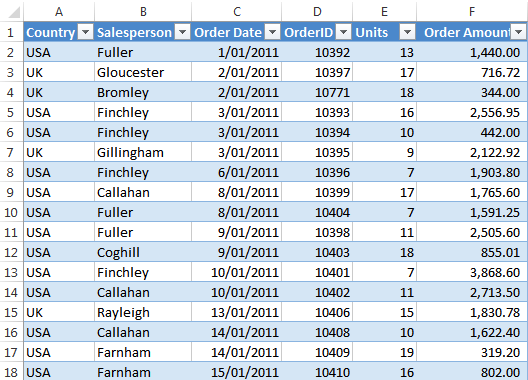

Where are the rows, columns, and indexes in this excel sheet?

## `pandas` library 🐼

`pandas` is a very common library that is used for working with tabular data.  It is cannonically imported like this:

In [2]:
# Import the libary.  You only have to do this once per file.
import pandas as pd

In [ ]:
# This line shortens the output. It will be explained more later in the notebook.
pd.set_option('display.max_rows', 10)

## `pandas` Data structures

There are two primary `pandas` data structures:
1. `pd.Series`
2. `pd.DataFrame`

`Series` is the simplier of the two structures, but `DataFrames` are more common so that is what you will likely mostly be working with.

### `pd.DataFrame`
A `pandas` **dataframe** is a data structure organized into rows and columns.  Other important parts of the anatomy of a data frame are the columns names and the index.

![Pandas Dataframe](./images/pandas_dataframe.png)

_Image ammended from 
[pandas documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html)._

Here's how we can make one from a little bit of scratch data.

In [13]:
# Step 1 - Define our fake data with a dictionary
forecast_dict = {
    'temperature': [25, 20, 27, 31], 
    'humidity': [60, 65, 62, 80],
    'wind_speed': [10, 9, 10, 6]
}

In [ ]:
# Step 2 - use `pd.DataFrame()` to convert our dictionary into a dataframe
# Assign it to a variable called `forecast`
forecast = pd.DataFrame(forecast_dict)

In [ ]:
# View the dataframe
forecast

Our first dataframe!  We can see that we have 3 columns, with column names `temperature`, `humidity`, and `wind_speed`.  We have 4 data entries, or 4 rows, labeled by our indexes, which in this case are just the numbers 0-3.

:::{admonition} 📝 Check your understanding
:class: tip

Label the boxed pieces of the dataframe.

:::

In [ ]:
snow_report = {
    'new_snow': [6, 4, 0, 3], 
    'snow_water_equivalent': [0.33, 0.6, 0.52, 0.7],
    'base_depth': [42, 50, 50, 37]
}
pd.DataFrame(snow_report)

### `pd.Series`

The other major `pandas` data strucutre is a **Series**, which represents just a single column of a dataframe.  It still has indexes, like a dataframe, but since a series is only ever a single column it doesn't have a column name.

<img src="https://www.datasciencemadesimple.com/wp-content/uploads/2020/05/create-series-in-python-pandas-0.png" width=620>

_Image from 
[Data Science Made Simple](https://www.datasciencemadesimple.com/create-series-in-python-pandas/)._

We access a single series (column) of our dataframe using brackets and the name of the column.

In [ ]:
# Viewing a series (column) of data from a dataframe.
forecast['humidity']

## Accessing values in `pd.DataFrame()`

Even though pandas dataframes are new data structures, some of the patterns for accessing data are very similar to what we saw in the list and dictionary data structures.  What's exciting is that the concept -- indexing -- is conceptually similar and so in response the syntax is also similar.

Two main ways you may want to access data in a dataframe might be:
1. look at all the data in a single column
2. look at all the data in a single row

### View data in a single column
The syntax for this is akin to looking up an item in a dictionary:

In [ ]:
forecast['humidity']

### View data in a single row (indexing)
When looking up data for a row we use the indexes, and the same `[]` syntax that we have seen in lists.  `pandas` uses the `[]` and `:` notation in the exact same way.  The only new addition is the `.iloc` syntax that goes before the square brackets `[]`.

In [ ]:
# Display just the row of index 2
forecast.iloc[2]

In [ ]:
# Display rows index 2-3
forecast.iloc[2:4]

:::{admonition} 📝 Check your understanding
:class: tip

1. What would be the value of `forecast['humidity'].iloc[2]`?
2. What is the datatype of `forecast['humidity']`?

:::

### 🌟 A note about assigning dataframes to variables
It's easy to feel like when you do something to find one part of a dataframe (Ex. `forecast.iloc[2:4]` or `forecast['humidity']`) you have changed the dataframe.  This is not the case, however, and the original dataframe stays the same.

In [ ]:
# Looking up the 2nd and 3rd indices of the forecast dataframe
forecast.iloc[2:4]

In [ ]:
# `forecast` is still the same dataframe
forecast

This is nice for data exploration, when you don't want the values to change every time you look at them.  If you are trying to permanently change your data, you need to remember to update the dataframe by reassigning the variable.

In [ ]:
# Updating the forecast variable with just the two rows
forecast = forecast.iloc[2:4]

In [ ]:
# `forecast was updated`
forecast

## Using some real data❗️

To work with the `pandas` library we'll use as an example some [USGS stream gauge data](https://waterdata.usgs.gov/nwis) ([Source link](https://waterdata.usgs.gov/monitoring-location/06711565/#parameterCode=00060&period=P30D)).  

First let's open up the file.  We aren't going to dive into this too much so right now just notice that the function I used is `pd.read_csv()` ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [4]:
# Read in the data
water_vars = pd.read_csv('./data/englewood_3_12_21_usgs_water.tsv', sep='\t', skiprows=30)

In [5]:
# Check it out 👀
water_vars

,agency_cd,site_no,datetime,tz_cd,210920_00060,210920_00060_cd,210922_00010,210922_00010_cd,210924_00300,210924_00300_cd,210925_00400,210925_00400_cd
0,5s,15s,20d,6s,14n,10s,14n,10s,14n,10s,14n,10s
1,USGS,06711565,2021-03-12 00:00,MST,44.5,P,8.1,P,8.3,P,8.1,P
2,USGS,06711565,2021-03-12 00:15,MST,44.5,P,8.1,P,8.2,P,8.1,P
3,USGS,06711565,2021-03-12 00:30,MST,44.5,P,8.1,P,8.2,P,8.1,P
4,USGS,06711565,2021-03-12 00:45,MST,44.5,P,8.1,P,8.1,P,8.1,P
...,...,...,...,...,...,...,...,...,...,...,...,...
142,USGS,06711565,2021-03-13 11:15,MST,42.6,P,6.7,P,9.8,P,7.9,P
143,USGS,06711565,2021-03-13 11:30,MST,42.6,P,6.7,P,9.9,P,7.9,P
144,USGS,06711565,2021-03-13 11:45,MST,42.6,P,6.7,P,10.2,P,7.9,P
145,USGS,06711565,2021-03-13 12:00,MST,46.5,P,6.7,P,10.3,P,7.9,P


**Option 2**: This piece of code below also works and is more specialized to tab-seperated sheets.  I chose to use the more generalized `read_csv` function above.

```
df = pd.read_table('./data/englewood_3_12_21_usgs_water.tsv', skiprows=31)
```

### Filepaths

Your computer is organized **hierarchically**.
![File Structure](./images/computer_structure.png)

Figure [from](https://www.researchgate.net/figure/Overview-of-structure-of-folders-for-tool_fig1_332775326)

The other part of that data loading statement to take note is the `'./data/englewood_3_12_21_usgs_water.tsv'` part.  This is called the **filepath** and it is a string that describes the location of the data that you want to open.  A few pieces of the anatomy of a filepath to notice:
* `/` - forward slashes signal that you have entered a new folder.
* `.tsv` - this is the file extension, which tells us what type of file format the data is stored in an informs us how we open it
* `.` - the period at the beginning tells the computer to start looking for data in the same place tht the code is being run in.  

Choosing to start your filepath with a `.` is called specificying a **relative filepath**, because you are telling the computer to start looking for the file relative to where the file is being run. If you move this file to another place on your computer and don't move the data with it the import statment won't work anymore.  The alternative to a relative filepath is an **aboslute filepath**, in which case you start your file path at the very tippy top of your computer's organizational structure (the root directory).

Other vocab notes:
* **directory** is the same thing as a folder.

To loop back to our example, we put together our filepath by defining the following directions for our computer:
1. start by specifing the current directory as the starting point: `.`
2. go into the data folder: `./data`
3. choose the file named englewood_3_12_21_usgs_water.tsv: `'./data/englewood_3_12_21_usgs_water.tsv'`

🎉 And there we have our file

### Back to our data
This data isn't super meaningful at first glance.  In the block of code below I do some formatting to improve that.  This step is often called **data cleaning** is unfortunately pretty common with real world data. You will likely spend a chunk of your time on this.  (This is sometimes refered to as the [80/20 rule](https://www.infoworld.com/article/3228245/the-80-20-data-science-dilemma.html) for data science and there is a lot of chatter that goes into trying to reverse it).

That isn't the focus right now, though.  I want to get onto working with the data so I've smushed all these lines of code together.  I left comments so if you want to come back later to break this into seperate code blocks and see what I did you can.

In [7]:
# There are a lot of variables here, so let's shorten our dataframe to a few variables
water_vars = water_vars[['datetime', '210920_00060', '210922_00010', '210924_00300', '210925_00400']]
# Get rid of the first row of hard-coded datatype info
water_vars = water_vars.drop(0)
# Rename the columns from their USGS codes to more human-readible names
name_codes = {'210920_00060': 'discharge','210922_00010': 'temperature', '210924_00300': 'dissolved oxygen', '210925_00400': 'pH'}
water_vars = water_vars.rename(columns=name_codes)

Our cleaned version of the data:

In [10]:
water_vars

,datetime,discharge,temperature,dissolved oxygen,pH
1,2021-03-12 00:00,44.5,8.1,8.3,8.1
2,2021-03-12 00:15,44.5,8.1,8.2,8.1
3,2021-03-12 00:30,44.5,8.1,8.2,8.1
4,2021-03-12 00:45,44.5,8.1,8.1,8.1
5,2021-03-12 01:00,44.5,8.1,8.1,8.1
6,2021-03-12 01:15,44.5,8.1,8.1,8.1
7,2021-03-12 01:30,44.5,8.0,8.0,8.1
8,2021-03-12 01:45,44.5,8.0,8.0,8.1
9,2021-03-12 02:00,44.5,8.0,8.0,8.1
10,2021-03-12 02:15,44.5,8.0,8.0,8.1


### Accessing larger data

Our example dataframes from the previous section were small enough that we could always see the whole thing just by printing it.  That won't usually be the case with real data. 

When the data is long there are other ways besides reading through it all to help you get a sense of the data.  One way is to get some overview statistics with the `.info()` or the `.describe()` methods.

`.info()` returns:
- data type and number of indexes
- index values
- columns with number of non-null values and data type
- how much memory the object uses

In [ ]:
water_vars.info()

for each column `.describe()` returns:
* "count" - number of non-null values
* "unique" - number of different values
* "top" - most common value
* "freq" - how often the most common value occurs

In [14]:
water_vars.describe()

,datetime,discharge,temperature,dissolved oxygen,pH
count,146,145,144,146,146
unique,146,6,20,47,5
top,2021-03-12 14:15,44.5,7.7,8.2,7.9
freq,1,52,18,24,55


:::{admonition} 🌀 More Info: Viewing more rows
:class: note, dropdown

By default Jupyter will shorten the data and tell you that it has done that by putting the row of `...` in the middle. If you would like to change the default to show more rows or columns you can do that with:

```
# Here 20 is the number of rows you would like to display
pd.set_option('display.max_rows', 20)
```

:::

## Aggregations

Another way to get a sense of your data is to run a few aggregations on the data, such as taking the max or min of specific columns. You also might need to do this as a part of your research.
Some common aggregations:

![Aggregations](./images/pandas_aggregations.png)

_Table from [jakevdp's Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)_

In [18]:
water_vars.max()

datetime            2021-03-13 12:15
dissolved oxygen                 9.9
pH                               8.2
dtype: object

One thing to notice is that the dataframe only returns the aggregation for the columns that do not have any NaN values.  If you would like to get all the columns you need to first drop the nan values with `.dropna()`.

In [19]:
water_vars.dropna().max()

datetime            2021-03-13 12:00
discharge                       48.5
temperature                      8.5
dissolved oxygen                 9.9
pH                               8.2
dtype: object

:::{admonition} 📝 Check your understanding
:class: tip

1. how many null items are there in the `temperature` column?
1. what is the most common dissolved oxygen value?
2. print the standard deviation of all of the columns of the `water_vars` dataframe

:::